# A. Case Background

SMART;

- S   : Membuat analisis sebagai pendukung keputusan apakah akan jadi untuk membeli sebuah lapangan migas.
- M   : mencari water cut untuk, peresebaran data, hubungan antara produksi minyak dan air.
- A   : mendapatkan data untuk mendukung keputusan ahir
- R   : berdasarkan data water cut dapat dijadikan indikasi kualitas pinang field
- T   : Analisa harus selesai dalam 2 minggu agar dapat segera didiskusikan

problem statement

- Sebuah perusahaan migas bernama HK OnG berencana meng-akuisisi sebuah lapangn bernama Pinang Field dari perusahaan lain namun ternyata perusahaan sebelumnya hanya memberikan sedikit informasi mengenai lapangan ini. Untuk itu HK OnG perlu melakukan analisis produksi dari Pinang Field dan diharapkan didapat pola tertentu untuk didapatkan keputusan apakah akan membeli atau tidak. Pinang Field sendiri memiliki 7 Sumur yang akan di analisis keseluruhannya. Adapun data yang dimiliki HK OnG berupa total produksi bulanan dan total akumulatif produksi minyak dan air setiap bulannya selama rentan waktu berproduksi (1988 - 2022).

Guna memudahkan analiis, HCK OnG menganalisis Pinang Field dengan rumusan
1. Berapa total produksi setiap sumur
2. Cek persebaran data (normal atau tidak normal)
3. Bagaimana hubungan produksi minyak dan air dari pinang field
4. Mengevaluasi efisiensi produksi minyak terhadap air (Oil–Water Ratio / OWR)
5. Bagaimana trend penurunan produksi minyak terhadap waktu
6. Menentukan sumur dengan potensi produksi terbaik berdasarkan watercut

# B. Data Loading

In [1]:
# IMPORT TOOLS
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr 

In [2]:
# MASUKKAN DATA KE DALAM VARIABEL DAN BUAT DATFRAME
df_pf=pd.read_excel('dATA.xlsx')
df_pf

,Datetime,Well_Name,Monthly_Oil_Prod (MMSTB),Monthly_Water_Prod (MMSTB),Cum_Oil _Prod (MMSTB),Cum_Wat_Prod (MMSTB)
0,1988-06-30,PIN_1,0.000815,0.000165,0.000815,0.000165
1,1988-07-31,PIN_1,0.010255,0.000085,0.011070,0.000250
2,1988-08-31,PIN_1,0.007916,0.000061,0.018986,0.000311
3,1988-09-30,PIN_1,0.007534,0.000000,0.026521,0.000311
4,1988-10-31,PIN_1,0.003348,0.000025,0.029869,0.000336
...,...,...,...,...,...,...
1967,2021-09-30,PIN_6,0.000000,0.000000,0.127492,0.682811
1968,2021-10-31,PIN_6,0.000000,0.000000,0.127492,0.682811
1969,2021-11-30,PIN_6,0.000000,0.000000,0.127492,0.682811
1970,2021-12-31,PIN_6,0.000000,0.000000,0.127492,0.682811


# C. Data Cleaning


## Cek Statistik Data 

In [3]:
# cek type data pada setiap kolom

df_pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    1972 non-null   datetime64[ns]
 1   Well_Name                   1972 non-null   object        
 2   Monthly_Oil_Prod (MMSTB)    1972 non-null   float64       
 3   Monthly_Water_Prod (MMSTB)  1972 non-null   float64       
 4   Cum_Oil _Prod (MMSTB)       1972 non-null   float64       
 5   Cum_Wat_Prod (MMSTB)        1972 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 92.6+ KB


Data pada Setiap Kolom Sudah Sesuai

In [4]:
#  cek missing Value

df_pf.isnull().sum()

Datetime                      0
Well_Name                     0
Monthly_Oil_Prod (MMSTB)      0
Monthly_Water_Prod (MMSTB)    0
Cum_Oil _Prod (MMSTB)         0
Cum_Wat_Prod (MMSTB)          0
dtype: int64

Setelah data dicek, ternyata tidak ada kolom yang kosong dan data sudah clean hingga bisa lanjut ke EDA

# D. Exploration and Analysis

## 1. Cek Outliers

pada dasarnya outlier pada projek ini dilakukan untuk melihat kemungkinan yang terjadi pada sumur, jika data dibawah lower bound maka dianggap saat itu sumur mengalami shut-down, kemudian jika berada diatas upper bound maka sumur tersebut baru saja dilakukan stimulasi sehingga produksi nya melonjak, sehingga temuan outlier pada case ini tidak akan di ubah atau di hapus. Cek outliers akan dilakukan persumur, sehingga perlu dilakukan pengecekkan jumlah dan nama setiap sumur

In [5]:
# melihat jumlah dan nama setiap sumur pada pinang field

jm = df_pf['Well_Name'].nunique()
nm = df_pf['Well_Name'].unique()

print(f'Pinang Field memiliki {jm} sumur ')
print(f'Adapun ke-{jm} sumur pinang field adalah {nm} ')


Pinang Field memiliki 6 sumur 
Adapun ke-6 sumur pinang field adalah ['PIN_1' 'PIN_2' 'PIN_3' 'PIN_4' 'PIN_5' 'PIN_6'] 


### 1. Sumur PIN_1

In [6]:
# membuat dataframe yang berisi sumur PIN_1 saja
PIN_1=df_pf[df_pf['Well_Name']=='PIN_1'] 
PIN_1.head(3)


,Datetime,Well_Name,Monthly_Oil_Prod (MMSTB),Monthly_Water_Prod (MMSTB),Cum_Oil _Prod (MMSTB),Cum_Wat_Prod (MMSTB)
0,1988-06-30,PIN_1,0.000815,0.000165,0.000815,0.000165
1,1988-07-31,PIN_1,0.010255,0.000085,0.011070,0.000250
2,1988-08-31,PIN_1,0.007916,0.000061,0.018986,0.000311


In [7]:
#  cekk Outlier sumur PIN_1
## OIl
Q1_oil = PIN_1['Monthly_Oil_Prod (MMSTB)'].quantile(0.25)
Q3_oil = PIN_1['Monthly_Oil_Prod (MMSTB)'].quantile(0.75)
IQR_oil = Q3_oil- Q1_oil

lower_bound_oil = Q1_oil - 1.5 * IQR_oil
upper_bound_oil = Q3_oil + 1.5 * IQR_oil

## water
Q1_water = PIN_1['Monthly_Water_Prod (MMSTB)'].quantile(0.25)
Q3_water = PIN_1['Monthly_Water_Prod (MMSTB)'].quantile(0.75)
IQR_water = Q3_water- Q1_water

lower_bound_water = Q1_water - 1.5 * IQR_water
upper_bound_water = Q3_water + 1.5 * IQR_water

outliers_oil = PIN_1[(PIN_1['Monthly_Oil_Prod (MMSTB)'] < lower_bound_oil) | (PIN_1['Monthly_Oil_Prod (MMSTB)'] > upper_bound_oil)]
lower = len(PIN_1[PIN_1['Monthly_Oil_Prod (MMSTB)'] < lower_bound_oil])
uper = len(PIN_1[PIN_1['Monthly_Oil_Prod (MMSTB)'] > upper_bound_oil])

print(f"Jumlah outlier produksi bulanan minyak  : {len(outliers_oil)}")
print(f"Dengan outliar bawah sebesar {lower} data dan outlier atas sebesar {uper} data")

outliers_water = PIN_1[(PIN_1['Monthly_Water_Prod (MMSTB)'] < lower_bound_water) | (PIN_1['Monthly_Water_Prod (MMSTB)'] > upper_bound_water)]
lower = len(PIN_1[PIN_1['Monthly_Water_Prod (MMSTB)'] < lower_bound_water])
uper = len(PIN_1[PIN_1['Monthly_Water_Prod (MMSTB)'] > upper_bound_water])
print(f"\nJumlah outlier produksi bulanan air     : {len(outliers_water)}")
print(f"Dengan outliar bawah sebesar {lower} data dan outlier atas sebesar {uper} data")

Jumlah outlier produksi bulanan minyak  : 32
Dengan outliar bawah sebesar 0 data dan outlier atas sebesar 32 data

Jumlah outlier produksi bulanan air     : 77
Dengan outliar bawah sebesar 0 data dan outlier atas sebesar 77 data


Didapat bahwa semua outlier data pada sumur PIN_1 semua outlier berada diatas Upper bound

### 2. Sumur PIN_2

In [8]:
# membuat dataframe yang berisi sumur PIN_2 saja
PIN_2=df_pf[df_pf['Well_Name']=='PIN_2'] 
PIN_2.head(3)

,Datetime,Well_Name,Monthly_Oil_Prod (MMSTB),Monthly_Water_Prod (MMSTB),Cum_Oil _Prod (MMSTB),Cum_Wat_Prod (MMSTB)
398,1988-06-30,PIN_2,0.002189,0.000039,0.002189,0.000039
399,1988-07-31,PIN_2,0.009707,0.000208,0.011896,0.000247
400,1988-08-31,PIN_2,0.012662,0.000259,0.024558,0.000506


In [9]:
#  cekk Outlier sumur PIN_2
## OIl
Q1_oil = PIN_2['Monthly_Oil_Prod (MMSTB)'].quantile(0.25)
Q3_oil = PIN_2['Monthly_Oil_Prod (MMSTB)'].quantile(0.75)
IQR_oil = Q3_oil- Q1_oil

lower_bound_oil = Q1_oil - 1.5 * IQR_oil
upper_bound_oil = Q3_oil + 1.5 * IQR_oil

## water
Q1_water = PIN_2['Monthly_Water_Prod (MMSTB)'].quantile(0.25)
Q3_water = PIN_2['Monthly_Water_Prod (MMSTB)'].quantile(0.75)
IQR_water = Q3_water- Q1_water

lower_bound_water = Q1_water - 1.5 * IQR_water
upper_bound_water = Q3_water + 1.5 * IQR_water

outliers_oil = PIN_2[(PIN_2['Monthly_Oil_Prod (MMSTB)'] < lower_bound_oil) | (PIN_2['Monthly_Oil_Prod (MMSTB)'] > upper_bound_oil)]
lower = len(PIN_2[PIN_2['Monthly_Oil_Prod (MMSTB)'] < lower_bound_oil])
uper = len(PIN_2[PIN_2['Monthly_Oil_Prod (MMSTB)'] > upper_bound_oil])

print(f"Jumlah outlier produksi bulanan minyak  : {len(outliers_oil)}")
print(f"Dengan outliar bawah sebesar {lower} data dan outlier atas sebesar {uper} data")

outliers_water = PIN_2[(PIN_2['Monthly_Water_Prod (MMSTB)'] < lower_bound_water) | (PIN_2['Monthly_Water_Prod (MMSTB)'] > upper_bound_water)]
lower = len(PIN_2[PIN_2['Monthly_Water_Prod (MMSTB)'] < lower_bound_water])
uper = len(PIN_2[PIN_2['Monthly_Water_Prod (MMSTB)'] > upper_bound_water])
print(f"\nJumlah outlier produksi bulanan air     : {len(outliers_water)}")
print(f"Dengan outliar bawah sebesar {lower} data dan outlier atas sebesar {uper} data")

Jumlah outlier produksi bulanan minyak  : 71
Dengan outliar bawah sebesar 0 data dan outlier atas sebesar 71 data

Jumlah outlier produksi bulanan air     : 75
Dengan outliar bawah sebesar 0 data dan outlier atas sebesar 75 data


Didapat bahwa semua outlier data pada sumur PIN_2 semua outlier berada diatas Upper bound

In [10]:
# membuat dataframe yang berisi sumur PIN_3 saja
PIN_3=df_pf[df_pf['Well_Name']=='PIN_3'] 
PIN_3.head(3)

,Datetime,Well_Name,Monthly_Oil_Prod (MMSTB),Monthly_Water_Prod (MMSTB),Cum_Oil _Prod (MMSTB),Cum_Wat_Prod (MMSTB)
802,1989-11-30,PIN_3,0.002514,0.000860,0.002514,0.000860
803,1989-12-31,PIN_3,0.004825,0.000595,0.007339,0.001455
804,1990-01-31,PIN_3,0.001585,0.000176,0.008925,0.001630


In [11]:
#  cekk Outlier sumur PIN_3
## OIl
Q1_oil = PIN_3['Monthly_Oil_Prod (MMSTB)'].quantile(0.25)
Q3_oil = PIN_3['Monthly_Oil_Prod (MMSTB)'].quantile(0.75)
IQR_oil = Q3_oil- Q1_oil

lower_bound_oil = Q1_oil - 1.5 * IQR_oil
upper_bound_oil = Q3_oil + 1.5 * IQR_oil

## water
Q1_water = PIN_3['Monthly_Water_Prod (MMSTB)'].quantile(0.25)
Q3_water = PIN_3['Monthly_Water_Prod (MMSTB)'].quantile(0.75)
IQR_water = Q3_water- Q1_water

lower_bound_water = Q1_water - 1.5 * IQR_water
upper_bound_water = Q3_water + 1.5 * IQR_water

outliers_oil = PIN_3[(PIN_3['Monthly_Oil_Prod (MMSTB)'] < lower_bound_oil) | (PIN_3['Monthly_Oil_Prod (MMSTB)'] > upper_bound_oil)]
lower = len(PIN_3[PIN_3['Monthly_Oil_Prod (MMSTB)'] < lower_bound_oil])
uper = len(PIN_3[PIN_3['Monthly_Oil_Prod (MMSTB)'] > upper_bound_oil])

print(f"Jumlah outlier produksi bulanan minyak  : {len(outliers_oil)}")
print(f"Dengan outliar bawah sebesar {lower} data dan outlier atas sebesar {uper} data")

outliers_water = PIN_3[(PIN_3['Monthly_Water_Prod (MMSTB)'] < lower_bound_water) | (PIN_3['Monthly_Water_Prod (MMSTB)'] > upper_bound_water)]
lower = len(PIN_3[PIN_3['Monthly_Water_Prod (MMSTB)'] < lower_bound_water])
uper = len(PIN_3[PIN_3['Monthly_Water_Prod (MMSTB)'] > upper_bound_water])
print(f"\nJumlah outlier produksi bulanan air     : {len(outliers_water)}")
print(f"Dengan outliar bawah sebesar {lower} data dan outlier atas sebesar {uper} data")

Jumlah outlier produksi bulanan minyak  : 8
Dengan outliar bawah sebesar 0 data dan outlier atas sebesar 8 data

Jumlah outlier produksi bulanan air     : 51
Dengan outliar bawah sebesar 0 data dan outlier atas sebesar 51 data


Didapat bahwa semua outlier data pada sumur PIN_3 semua outlier berada diatas Upper bound

In [12]:
# membuat dataframe yang berisi sumur PIN_4 saja
PIN_4=df_pf[df_pf['Well_Name']=='PIN_4'] 
PIN_4.head(3)

,Datetime,Well_Name,Monthly_Oil_Prod (MMSTB),Monthly_Water_Prod (MMSTB),Cum_Oil _Prod (MMSTB),Cum_Wat_Prod (MMSTB)
1189,1992-06-30,PIN_4,0.0002,0.008530,0.0002,0.008530
1190,1992-07-31,PIN_4,0.0000,0.001959,0.0002,0.010489
1191,1992-08-31,PIN_4,0.0000,0.000012,0.0002,0.010501


In [13]:
#  cekk Outlier sumur PIN_4
## OIl
Q1_oil = PIN_4['Monthly_Oil_Prod (MMSTB)'].quantile(0.25)
Q3_oil = PIN_4['Monthly_Oil_Prod (MMSTB)'].quantile(0.75)
IQR_oil = Q3_oil- Q1_oil

lower_bound_oil = Q1_oil - 1.5 * IQR_oil
upper_bound_oil = Q3_oil + 1.5 * IQR_oil

## water
Q1_water = PIN_4['Monthly_Water_Prod (MMSTB)'].quantile(0.25)
Q3_water = PIN_4['Monthly_Water_Prod (MMSTB)'].quantile(0.75)
IQR_water = Q3_water- Q1_water

lower_bound_water = Q1_water - 1.5 * IQR_water
upper_bound_water = Q3_water + 1.5 * IQR_water

outliers_oil = PIN_4[(PIN_4['Monthly_Oil_Prod (MMSTB)'] < lower_bound_oil) | (PIN_4['Monthly_Oil_Prod (MMSTB)'] > upper_bound_oil)]
lower = len(PIN_4[PIN_4['Monthly_Oil_Prod (MMSTB)'] < lower_bound_oil])
uper = len(PIN_4[PIN_4['Monthly_Oil_Prod (MMSTB)'] > upper_bound_oil])

print(f"Jumlah outlier produksi bulanan minyak  : {len(outliers_oil)}")
print(f"Dengan outliar bawah sebesar {lower} data dan outlier atas sebesar {uper} data")

outliers_water = PIN_4[(PIN_4['Monthly_Water_Prod (MMSTB)'] < lower_bound_water) | (PIN_4['Monthly_Water_Prod (MMSTB)'] > upper_bound_water)]
lower = len(PIN_4[PIN_4['Monthly_Water_Prod (MMSTB)'] < lower_bound_water])
uper = len(PIN_4[PIN_4['Monthly_Water_Prod (MMSTB)'] > upper_bound_water])
print(f"\nJumlah outlier produksi bulanan air     : {len(outliers_water)}")
print(f"Dengan outliar bawah sebesar {lower} data dan outlier atas sebesar {uper} data")

Jumlah outlier produksi bulanan minyak  : 4
Dengan outliar bawah sebesar 0 data dan outlier atas sebesar 4 data

Jumlah outlier produksi bulanan air     : 8
Dengan outliar bawah sebesar 0 data dan outlier atas sebesar 8 data


Didapat bahwa semua outlier data pada sumur PIN_4 semua outlier berada diatas Upper bound

In [14]:
# membuat dataframe yang berisi sumur PIN_5 saja
PIN_5=df_pf[df_pf['Well_Name']=='PIN_5'] 
PIN_5.head(3)

,Datetime,Well_Name,Monthly_Oil_Prod (MMSTB),Monthly_Water_Prod (MMSTB),Cum_Oil _Prod (MMSTB),Cum_Wat_Prod (MMSTB)
1545,1997-11-30,PIN_5,0.000274,0.000147,0.000274,0.000147
1546,1997-12-31,PIN_5,0.001354,0.000735,0.001627,0.000882
1547,1998-01-31,PIN_5,0.000000,0.000000,0.001627,0.000882


In [15]:
#  cekk Outlier sumur PIN_5
## OIl
Q1_oil = PIN_5['Monthly_Oil_Prod (MMSTB)'].quantile(0.25)
Q3_oil = PIN_5['Monthly_Oil_Prod (MMSTB)'].quantile(0.75)
IQR_oil = Q3_oil- Q1_oil

lower_bound_oil = Q1_oil - 1.5 * IQR_oil
upper_bound_oil = Q3_oil + 1.5 * IQR_oil

## water
Q1_water = PIN_5['Monthly_Water_Prod (MMSTB)'].quantile(0.25)
Q3_water = PIN_5['Monthly_Water_Prod (MMSTB)'].quantile(0.75)
IQR_water = Q3_water- Q1_water

lower_bound_water = Q1_water - 1.5 * IQR_water
upper_bound_water = Q3_water + 1.5 * IQR_water

outliers_oil = PIN_5[(PIN_5['Monthly_Oil_Prod (MMSTB)'] < lower_bound_oil) | (PIN_5['Monthly_Oil_Prod (MMSTB)'] > upper_bound_oil)]
lower = len(PIN_5[PIN_5['Monthly_Oil_Prod (MMSTB)'] < lower_bound_oil])
uper = len(PIN_5[PIN_5['Monthly_Oil_Prod (MMSTB)'] > upper_bound_oil])

print(f"Jumlah outlier produksi bulanan minyak  : {len(outliers_oil)}")
print(f"Dengan outliar bawah sebesar {lower} data dan outlier atas sebesar {uper} data")

outliers_water = PIN_5[(PIN_5['Monthly_Water_Prod (MMSTB)'] < lower_bound_water) | (PIN_5['Monthly_Water_Prod (MMSTB)'] > upper_bound_water)]
lower = len(PIN_5[PIN_5['Monthly_Water_Prod (MMSTB)'] < lower_bound_water])
uper = len(PIN_5[PIN_5['Monthly_Water_Prod (MMSTB)'] > upper_bound_water])
print(f"\nJumlah outlier produksi bulanan air     : {len(outliers_water)}")
print(f"Dengan outliar bawah sebesar {lower} data dan outlier atas sebesar {uper} data")

Jumlah outlier produksi bulanan minyak  : 21
Dengan outliar bawah sebesar 0 data dan outlier atas sebesar 21 data

Jumlah outlier produksi bulanan air     : 40
Dengan outliar bawah sebesar 0 data dan outlier atas sebesar 40 data


Didapat bahwa semua outlier data pada sumur PIN_4 semua outlier berada diatas Upper bound

In [16]:
# membuat dataframe yang berisi sumur PIN_3 saja
PIN_6=df_pf[df_pf['Well_Name']=='PIN_6'] 
PIN_6.head(3)

,Datetime,Well_Name,Monthly_Oil_Prod (MMSTB),Monthly_Water_Prod (MMSTB),Cum_Oil _Prod (MMSTB),Cum_Wat_Prod (MMSTB)
1836,2010-10-31,PIN_6,0.002325,0.001155,0.002325,0.001155
1837,2010-11-30,PIN_6,0.003716,0.002641,0.006041,0.003795
1838,2010-12-31,PIN_6,0.001733,0.003832,0.007775,0.007627


In [17]:
#  cekk Outlier sumur PIN_6
## OIl
Q1_oil = PIN_6['Monthly_Oil_Prod (MMSTB)'].quantile(0.25)
Q3_oil = PIN_6['Monthly_Oil_Prod (MMSTB)'].quantile(0.75)
IQR_oil = Q3_oil- Q1_oil

lower_bound_oil = Q1_oil - 1.5 * IQR_oil
upper_bound_oil = Q3_oil + 1.5 * IQR_oil

## water
Q1_water = PIN_3['Monthly_Water_Prod (MMSTB)'].quantile(0.25)
Q3_water = PIN_3['Monthly_Water_Prod (MMSTB)'].quantile(0.75)
IQR_water = Q3_water- Q1_water

lower_bound_water = Q1_water - 1.5 * IQR_water
upper_bound_water = Q3_water + 1.5 * IQR_water

outliers_oil = PIN_6[(PIN_6['Monthly_Oil_Prod (MMSTB)'] < lower_bound_oil) | (PIN_6['Monthly_Oil_Prod (MMSTB)'] > upper_bound_oil)]
lower = len(PIN_6[PIN_6['Monthly_Oil_Prod (MMSTB)'] < lower_bound_oil])
uper = len(PIN_6[PIN_6['Monthly_Oil_Prod (MMSTB)'] > upper_bound_oil])

print(f"Jumlah outlier produksi bulanan minyak  : {len(outliers_oil)}")
print(f"Dengan outliar bawah sebesar {lower} data dan outlier atas sebesar {uper} data")

outliers_water = PIN_6[(PIN_6['Monthly_Water_Prod (MMSTB)'] < lower_bound_water) | (PIN_6['Monthly_Water_Prod (MMSTB)'] > upper_bound_water)]
lower = len(PIN_6[PIN_6['Monthly_Water_Prod (MMSTB)'] < lower_bound_water])
uper = len(PIN_6[PIN_6['Monthly_Water_Prod (MMSTB)'] > upper_bound_water])
print(f"\nJumlah outlier produksi bulanan air     : {len(outliers_water)}")
print(f"Dengan outliar bawah sebesar {lower} data dan outlier atas sebesar {uper} data")

Jumlah outlier produksi bulanan minyak  : 4
Dengan outliar bawah sebesar 0 data dan outlier atas sebesar 4 data

Jumlah outlier produksi bulanan air     : 65
Dengan outliar bawah sebesar 0 data dan outlier atas sebesar 65 data


Didapat bahwa semua outlier data pada sumur PIN_6 semua outlier berada diatas Upper bound

Untuk kesimpulan sementara didapat bahwa keseluruhan outlier baik pada produksi bulanan minyak atau air tersebar pada batas atas. dapat diasumsikan bahwa semua sumur pernah mengalami stimulasi atau ditutup sementara untuk memulihkan pressure, sehingga saat di buka kembali rate bulanan berada diatas upper bound 



## 2. Total produksi Tiap Sumur 

In [18]:
p1 = sum(PIN_1['Monthly_Oil_Prod (MMSTB)'])
p2 = sum(PIN_2['Monthly_Oil_Prod (MMSTB)'])
p3 = sum(PIN_3['Monthly_Oil_Prod (MMSTB)'])
p4 = sum(PIN_4['Monthly_Oil_Prod (MMSTB)'])
p5 = sum(PIN_5['Monthly_Oil_Prod (MMSTB)'])
p6 = sum(PIN_6['Monthly_Oil_Prod (MMSTB)'])


print (f'total produksi untuk sumur PIN_1 : {p1} MMSTB')
print (f'total produksi untuk sumur PIN_2 : {p2} MMSTB')
print (f'total produksi untuk sumur PIN_3 : {p3} MMSTB')
print (f'total produksi untuk sumur PIN_4 : {p4} MMSTB')
print (f'total produksi untuk sumur PIN_5 : {p5} MMSTB')
print (f'total produksi untuk sumur PIN_6 : {p6} MMSTB')

total produksi untuk sumur PIN_1 : 0.578411 MMSTB
total produksi untuk sumur PIN_2 : 0.830738 MMSTB
total produksi untuk sumur PIN_3 : 0.509379 MMSTB
total produksi untuk sumur PIN_4 : 0.00101665 MMSTB
total produksi untuk sumur PIN_5 : 0.405987 MMSTB
total produksi untuk sumur PIN_6 : 0.127492 MMSTB


In [19]:
total = {
    'PIN_1':p1,
    'PIN_2':p2,
    'PIN_3':p3,
    'PIN_4':p4,
    'PIN_5':p5,
    'PIN_6':p6

}

total = pd.DataFrame(list(total.items()), columns=['Nama_Sumur', 'Total_Produksi (MMSTB)'])

total

,Nama_Sumur,Total_Produksi (MMSTB)
0,PIN_1,0.578411
1,PIN_2,0.830738
2,PIN_3,0.509379
3,PIN_4,0.001017
4,PIN_5,0.405987
5,PIN_6,0.127492


berdasarkan data diatas didapat bahwa, sumur PIN_2 memiliki produksi paling banyak dan sumur PIN_6 paling sedikit

In [20]:
total.to_excel('total.xlsx')

## 3. Cek Persebaran Data tiap Sumur

In [21]:
PIN_1[['Monthly_Oil_Prod (MMSTB)', 'Monthly_Water_Prod (MMSTB)']].skew()

Monthly_Oil_Prod (MMSTB)      2.318858
Monthly_Water_Prod (MMSTB)    2.262087
dtype: float64

In [22]:
PIN_2[['Monthly_Oil_Prod (MMSTB)', 'Monthly_Water_Prod (MMSTB)']].skew()

Monthly_Oil_Prod (MMSTB)      2.040540
Monthly_Water_Prod (MMSTB)    6.820541
dtype: float64

In [23]:
PIN_3[['Monthly_Oil_Prod (MMSTB)', 'Monthly_Water_Prod (MMSTB)']].skew()

Monthly_Oil_Prod (MMSTB)      1.478109
Monthly_Water_Prod (MMSTB)    2.191798
dtype: float64

In [24]:
PIN_4[['Monthly_Oil_Prod (MMSTB)', 'Monthly_Water_Prod (MMSTB)']].skew()

Monthly_Oil_Prod (MMSTB)      10.886070
Monthly_Water_Prod (MMSTB)     9.056741
dtype: float64

In [25]:
PIN_5[['Monthly_Oil_Prod (MMSTB)', 'Monthly_Water_Prod (MMSTB)']].skew()

Monthly_Oil_Prod (MMSTB)      2.103275
Monthly_Water_Prod (MMSTB)    1.687881
dtype: float64

In [26]:
PIN_6[['Monthly_Oil_Prod (MMSTB)', 'Monthly_Water_Prod (MMSTB)']].skew()

Monthly_Oil_Prod (MMSTB)      1.294441
Monthly_Water_Prod (MMSTB)    0.598225
dtype: float64

In [27]:
df_pf[['Monthly_Oil_Prod (MMSTB)', 'Monthly_Water_Prod (MMSTB)']].skew()

Monthly_Oil_Prod (MMSTB)      3.055385
Monthly_Water_Prod (MMSTB)    5.822501
dtype: float64

Berdasarkan uji skewness, data terdistribusi tidak normal baik untuk air atau pun minyak pada semua sumur

## 4. Minyak vs Water

karena data terdistribusi tidak normal maka dilakukan uji dengan metode spearman

H0 = maka variabel tidak berkatitan
H1 = maka variabel saling berkaitan

jika P value > 0.05 maka H0 gagal ditolak
jika P Value <= 0.05 maka H0 ditolak

### a. Sumur PIN_1

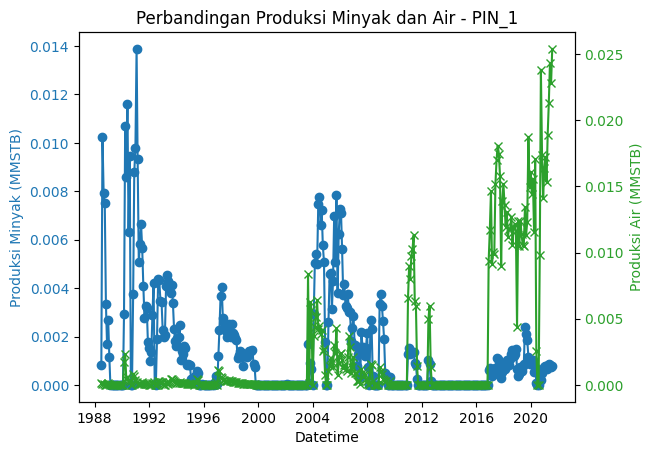

In [28]:
# plot sumur PIN_1 


fig, ax1 = plt.subplots()

# sumbu kiri untuk minyak
ax1.plot(PIN_1['Datetime'], PIN_1['Monthly_Oil_Prod (MMSTB)'], 
         color='tab:blue', marker='o', label='Oil Production')
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Produksi Minyak (MMSTB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# sumbu kanan untuk air
ax2 = ax1.twinx()  # buat sumbu y kedua
ax2.plot(PIN_1['Datetime'], PIN_1['Monthly_Water_Prod (MMSTB)'], 
         color='tab:green', marker='x', label='Water Production')
ax2.set_ylabel('Produksi Air (MMSTB)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# untuk judul 
plt.title('Perbandingan Produksi Minyak dan Air - PIN_1')

plt.show()

berdasarkan grafik diatas

untuk produksi minyak bulanan (warna biru) terjadi fluktuatif terdapat beberapa fase dimana prduksi minyak menyentuh 0 sampai beberapa saat lalu diproduksikan kembali dengan angka yang cukup signifikan tinggi. Terdapat kemungkinan pada saat produksi berhenti dilakukan perbaikan sehingga saat sumur beroprasi kembali mencapai produksi yang tinggi.

untuk produksi air cenderung rendah di awal produksi sampai sekitar tahun 2004 air terproduksi linier dengan minyak terproduksi dan di tahun 2016 terjadi peningkatan air terproduksi yang sangat signifikan

In [29]:
# berdasarkan uji skewness didapat bahwa data terdistribusi tidak normal, sehingga untuk uji hipotesis dapat digunakan spearman correlation


# uji spearmanr untuk mendapat hubungan antara monthly oil prod dan water prod
oil = PIN_1['Monthly_Oil_Prod (MMSTB)']
water = PIN_1['Monthly_Water_Prod (MMSTB)']

# hitung korelasi Spearman
spear, pval = spearmanr(oil, water)

print(f"Koefisien korelasi Spearman: {spear}")
print(f"p-value: {pval}")



Koefisien korelasi Spearman: 0.7323932441717728
p-value: 4.300903640044744e-68


Berdasarkan spearmanr dan p-Value didapat bahwa monthly oil and water prod memiliki hubungan linier yg kuat

### b. Sumur PIN_2

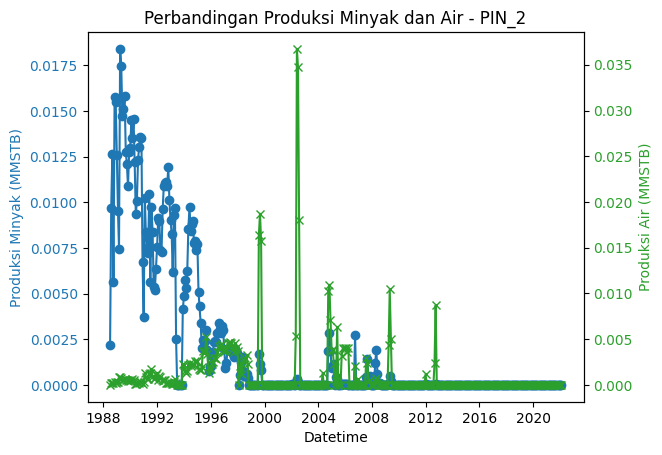

In [30]:
# plot sumur PIN_2 

fig, ax1 = plt.subplots()

# sumbu kiri untuk minyak
ax1.plot(PIN_2['Datetime'], PIN_2['Monthly_Oil_Prod (MMSTB)'], 
         color='tab:blue', marker='o', label='Oil Production')
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Produksi Minyak (MMSTB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# sumbu kanan untuk air
ax2 = ax1.twinx()  # buat sumbu y kedua
ax2.plot(PIN_2['Datetime'], PIN_2['Monthly_Water_Prod (MMSTB)'], 
         color='tab:green', marker='x', label='Water Production')
ax2.set_ylabel('Produksi Air (MMSTB)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# untuk judul 
plt.title('Perbandingan Produksi Minyak dan Air - PIN_2')

plt.show()

berdasarkan grafik diatas produksi minyak mengalami peningkatan produksi di 2 tahun pertamanya lalu mulai dluktuati dan puncak pada tahun 2000 produksi minyak sudah sangat sedikit dan tidak lagi berproduksi. Sedangkan pada air, sepertinya tidak ada hubungan antara minyak dan air terproduksi namun terdapat titik dimana produksi air sangat banyak dengan sangat sedikit produksi minyak


In [31]:
# uji spearmanr untuk mendapat hubungan antara monthly oil prod dan water prod
oil = PIN_2['Monthly_Oil_Prod (MMSTB)']
water = PIN_2['Monthly_Water_Prod (MMSTB)']

# hitung korelasi Spearman
spear, pval = spearmanr(oil, water)

print(f"Koefisien korelasi Spearman: {spear}")
print(f"p-value: {pval}")

Koefisien korelasi Spearman: 0.8605234920931044
p-value: 8.050061862939722e-120


Berdasarkan spearmanr dan p-Value didapat bahwa monthly oil and water prod memiliki hubungan linier yg kuat

### c. Sumur PIN_3

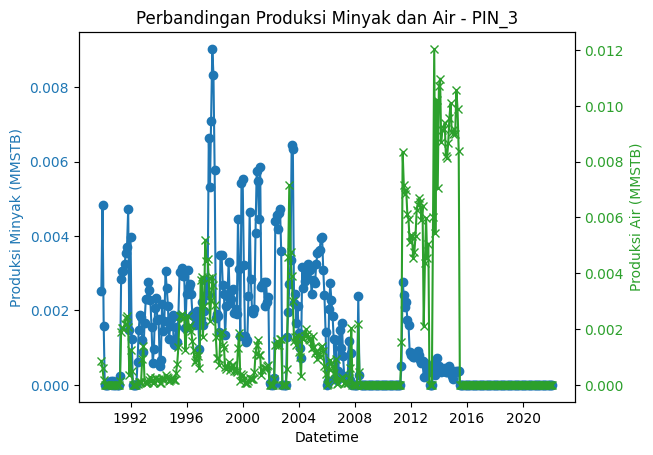

In [32]:
# plot sumur PIN_3 
fig, ax1 = plt.subplots()
# sumbu kiri untuk minyak
ax1.plot(PIN_3['Datetime'], PIN_3['Monthly_Oil_Prod (MMSTB)'], 
         color='tab:blue', marker='o', label='Oil Production')
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Produksi Minyak (MMSTB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# sumbu kanan untuk air
ax2 = ax1.twinx()  # buat sumbu y kedua
ax2.plot(PIN_3['Datetime'], PIN_3['Monthly_Water_Prod (MMSTB)'], 
         color='tab:green', marker='x', label='Water Production')
ax2.set_ylabel('Produksi Air (MMSTB)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# untuk judul 
plt.title('Perbandingan Produksi Minyak dan Air - PIN_3')

plt.show()

berdasarkan grafik diatas produksi minyak dan air cenderung linier dengan minyak yang mendominasi sampai ahirnya pada tahun 2012 produksi air sangat tinggi 


In [33]:
# uji spearmanr untuk mendapat hubungan antara monthly oil prod dan water prod
oil = PIN_3['Monthly_Oil_Prod (MMSTB)']
water = PIN_3['Monthly_Water_Prod (MMSTB)']

# hitung korelasi Spearman
spear, pval = spearmanr(oil, water)

print(f"Koefisien korelasi Spearman: {spear}")
print(f"p-value: {pval}")

Koefisien korelasi Spearman: 0.7586773504935267
p-value: 1.1926585956205225e-73


Berdasarkan spearmanr dan p-Value didapat bahwa monthly oil and water prod memiliki hubungan linier yg kuat

### d. Sumur PIN_4

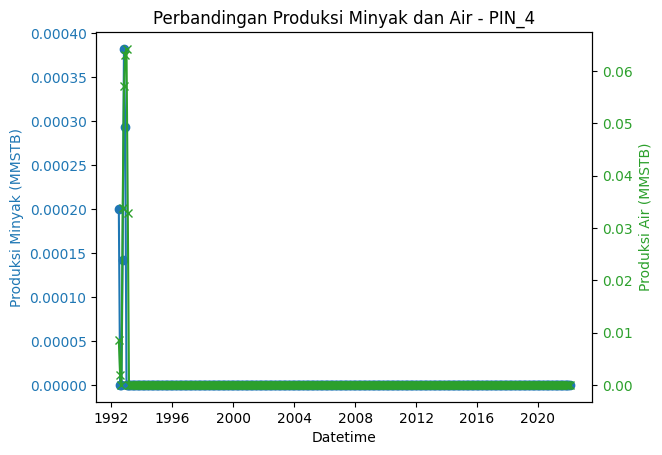

In [34]:
# plot sumur PIN_4 
fig, ax1 = plt.subplots()

# sumbu kiri untuk minyak
ax1.plot(PIN_4['Datetime'], PIN_4['Monthly_Oil_Prod (MMSTB)'], 
         color='tab:blue', marker='o', label='Oil Production')
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Produksi Minyak (MMSTB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# sumbu kanan untuk air
ax2 = ax1.twinx()  # buat sumbu y kedua
ax2.plot(PIN_4['Datetime'], PIN_4['Monthly_Water_Prod (MMSTB)'], 
         color='tab:green', marker='x', label='Water Production')
ax2.set_ylabel('Produksi Air (MMSTB)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# untuk judul 
plt.title('Perbandingan Produksi Minyak dan Air - PIN_4')
plt.show()

berdasarkan data diatas produksi sumur PIN_4 sangat jelek karna hanya mampu menghasilkan minyak dengan peak 0.0004 MMSTB dengan air yg lebih banyak yaitu 0.06 MMSTB, sehingga terdapat kemungkinan jika sumur PIN_4 sengaja di matikan karna tidak ekonomis

In [35]:
# uji spearmanr untuk mendapat hubungan antara monthly oil prod dan water prod
oil = PIN_4['Monthly_Oil_Prod (MMSTB)']
water = PIN_4['Monthly_Water_Prod (MMSTB)']

# hitung korelasi Spearman
spear, pval = spearmanr(oil, water)

print(f"Koefisien korelasi Spearman: {spear}")
print(f"p-value: {pval}")

Koefisien korelasi Spearman: 0.7060540945773512
p-value: 5.286066567462289e-55


Berdasarkan spearmanr dan p-Value didapat bahwa monthly oil and water prod memiliki hubungan linier yg kuat

### e. Sumur PIN_5

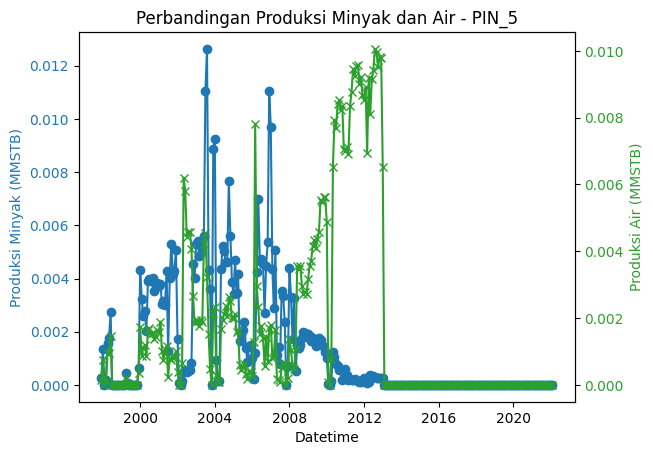

In [36]:
# plot sumur PIN_5 


fig, ax1 = plt.subplots()

# sumbu kiri untuk minyak
ax1.plot(PIN_5['Datetime'], PIN_5['Monthly_Oil_Prod (MMSTB)'], 
         color='tab:blue', marker='o', label='Oil Production')
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Produksi Minyak (MMSTB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# sumbu kanan untuk air
ax2 = ax1.twinx()  # buat sumbu y kedua
ax2.plot(PIN_5['Datetime'], PIN_5['Monthly_Water_Prod (MMSTB)'], 
         color='tab:green', marker='x', label='Water Production')
ax2.set_ylabel('Produksi Air (MMSTB)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# untuk judul 
plt.title('Perbandingan Produksi Minyak dan Air - PIN_5')
plt.show()

berdasarkan grafk diatas hubungan antara minyak dan air terproduksi cenderung linier dengan rasio yang tidak jauh, namun mulai di tahun 2008 air mulai meng-invasi sehingga diputuskan untuk sumur PIN_5 di shut ditandai dengan tidak adanya produksi minyak dan air.

In [37]:
# uji spearmanr untuk mendapat hubungan antara monthly oil prod dan water prod
oil = PIN_5['Monthly_Oil_Prod (MMSTB)']
water = PIN_5['Monthly_Water_Prod (MMSTB)']

# hitung korelasi Spearman
spear, pval = spearmanr(oil, water)

print(f"Koefisien korelasi Spearman: {spear}")
print(f"p-value: {pval}")

Koefisien korelasi Spearman: 0.7624448505346925
p-value: 1.410900965684462e-56


Berdasarkan spearmanr dan p-Value didapat bahwa monthly oil and water prod memiliki hubungan linier yg kuat

### f. Sumur PIN_6

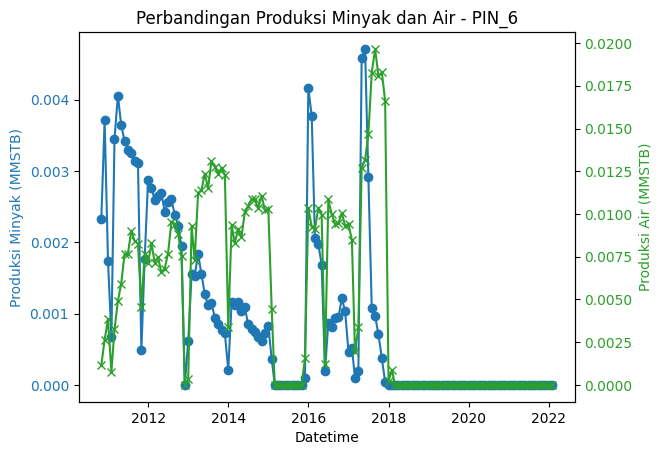

In [38]:
# plot sumur PIN_6 
fig, ax1 = plt.subplots()
# sumbu kiri untuk minyak
ax1.plot(PIN_6['Datetime'], PIN_6['Monthly_Oil_Prod (MMSTB)'], 
         color='tab:blue', marker='o', label='Oil Production')
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Produksi Minyak (MMSTB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# sumbu kanan
ax2 = ax1.twinx()  # buat sumbu y kedua
ax2.plot(PIN_6['Datetime'], PIN_6['Monthly_Water_Prod (MMSTB)'], 
         color='tab:green', marker='x', label='Water Production')
ax2.set_ylabel('Produksi Air (MMSTB)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# untuk judul 
plt.title('Perbandingan Produksi Minyak dan Air - PIN_6')
plt.show()

produksi minyak dan air pada sumur PIN_6 cenderung linier namun pada tahun 2013 air mulai mendominasi. kemudian sumur semapt di shut pada tahun 2015 dan di produksikan lagi pada 2016 namun terlihat produksi air dan minyak cenderung di dominasi oleh air sehingga produksi dihentikan pada tahun 2018.

In [39]:
# uji spearmanr untuk mendapat hubungan antara monthly oil prod dan water prod
oil = PIN_6['Monthly_Oil_Prod (MMSTB)']
water = PIN_6['Monthly_Water_Prod (MMSTB)']

# hitung korelasi Spearman
spear, pval = spearmanr(oil, water)

print(f"Koefisien korelasi Spearman: {spear}")
print(f"p-value: {pval}")

Koefisien korelasi Spearman: 0.7863643940875011
p-value: 8.130767750616611e-30


In [40]:
# uji spearmanr untuk mendapat hubungan antara monthly oil prod dan water prod
oil = df_pf['Monthly_Oil_Prod (MMSTB)']
water = df_pf['Monthly_Water_Prod (MMSTB)']

# hitung korelasi Spearman
spear, pval = spearmanr(oil, water)

print(f"Koefisien korelasi Spearman: {spear}")
print(f"p-value: {pval}")

Koefisien korelasi Spearman: 0.8579386830384489
p-value: 0.0


Berdasarkan data diatas bahwa keseluruhan data memiliki nilai PValue dibawah <0.05 yang artinya model gagal menolak H0 atau kedua variabel kemungkinan memiliki keterkaitan

## 5. menghitung rasio produksi antara produksi air dan minyak (water cut)

uji ini dilakukan untuk melihat perbandingan antara fluida yang terproduksi (apakah air atau minyak) karna pada dasarnya saat dilakukan produksi, minyak dan air diproduksikan secara bersamaan, jika air terproduksi lebih banyak, maka perusahaan akan mengalami kerugian, karena air tidak diinginkan 

untuk itu pada uji ini akan di tambahkan kolom baru (watercut)

### a. Sumur PIN_1

In [55]:
PIN_1['Water-Cut (%)']=(PIN_1['Monthly_Water_Prod (MMSTB)']/(PIN_1['Monthly_Water_Prod (MMSTB)']+PIN_1['Monthly_Oil_Prod (MMSTB)'])*100)
PIN_1['Water-Cut (%)'].median()

C:\Users\User\AppData\Local\Temp\ipykernel_30564\3805073401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PIN_1['Water-Cut (%)']=(PIN_1['Monthly_Water_Prod (MMSTB)']/(PIN_1['Monthly_Water_Prod (MMSTB)']+PIN_1['Monthly_Oil_Prod (MMSTB)'])*100)


25.24135156878516

### b. Sumur PIN_2

In [56]:
PIN_2['Water-Cut (%)']=(PIN_2['Monthly_Water_Prod (MMSTB)']/(PIN_2['Monthly_Water_Prod (MMSTB)']+PIN_2['Monthly_Oil_Prod (MMSTB)'])*100)
PIN_2['Water-Cut (%)'].median()

C:\Users\User\AppData\Local\Temp\ipykernel_30564\740703463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PIN_2['Water-Cut (%)']=(PIN_2['Monthly_Water_Prod (MMSTB)']/(PIN_2['Monthly_Water_Prod (MMSTB)']+PIN_2['Monthly_Oil_Prod (MMSTB)'])*100)


35.58234674270147

### c. Sumur PIN_3

In [43]:
PIN_3['Water-Cut (%)']=(PIN_3['Monthly_Water_Prod (MMSTB)']/(PIN_3['Monthly_Water_Prod (MMSTB)']+PIN_3['Monthly_Oil_Prod (MMSTB)'])*100)
PIN_3['Water-Cut (%)'].describe()

C:\Users\User\AppData\Local\Temp\ipykernel_30564\2100610574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PIN_3['Water-Cut (%)']=(PIN_3['Monthly_Water_Prod (MMSTB)']/(PIN_3['Monthly_Water_Prod (MMSTB)']+PIN_3['Monthly_Oil_Prod (MMSTB)'])*100)


count    243.000000
mean      39.866887
std       29.079850
min        0.000000
25%       19.689382
50%       32.632850
75%       52.181369
max       98.404372
Name: Water-Cut (%), dtype: float64

### d. Sumur PIN_4

In [44]:
PIN_4['Water-Cut (%)']=(PIN_4['Monthly_Water_Prod (MMSTB)']/(PIN_4['Monthly_Water_Prod (MMSTB)']+PIN_4['Monthly_Oil_Prod (MMSTB)'])*100)
PIN_4['Water-Cut (%)'].describe()

C:\Users\User\AppData\Local\Temp\ipykernel_30564\2956020648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PIN_4['Water-Cut (%)']=(PIN_4['Monthly_Water_Prod (MMSTB)']/(PIN_4['Monthly_Water_Prod (MMSTB)']+PIN_4['Monthly_Oil_Prod (MMSTB)'])*100)


count      8.000000
mean      99.520405
std        0.777962
min       97.709848
25%       99.487058
50%       99.790405
75%      100.000000
max      100.000000
Name: Water-Cut (%), dtype: float64

### e. Sumur PIN_5

In [45]:
PIN_5['Water-Cut (%)']=(PIN_5['Monthly_Water_Prod (MMSTB)']/(PIN_5['Monthly_Water_Prod (MMSTB)']+PIN_5['Monthly_Oil_Prod (MMSTB)'])*100)
PIN_5['Water-Cut (%)'].describe()

C:\Users\User\AppData\Local\Temp\ipykernel_30564\408755924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PIN_5['Water-Cut (%)']=(PIN_5['Monthly_Water_Prod (MMSTB)']/(PIN_5['Monthly_Water_Prod (MMSTB)']+PIN_5['Monthly_Oil_Prod (MMSTB)'])*100)


count    162.000000
mean      49.497700
std       31.724370
min        0.000000
25%       24.023695
50%       33.594256
75%       83.608419
max       98.860399
Name: Water-Cut (%), dtype: float64

### f. Sumur PIN_6

In [46]:
PIN_6['Water-Cut (%)']=(PIN_6['Monthly_Water_Prod (MMSTB)']/(PIN_6['Monthly_Water_Prod (MMSTB)']+PIN_6['Monthly_Oil_Prod (MMSTB)'])*100)
PIN_6['Water-Cut (%)'].describe()


C:\Users\User\AppData\Local\Temp\ipykernel_30564\2189935512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PIN_6['Water-Cut (%)']=(PIN_6['Monthly_Water_Prod (MMSTB)']/(PIN_6['Monthly_Water_Prod (MMSTB)']+PIN_6['Monthly_Oil_Prod (MMSTB)'])*100)


count     78.000000
mean      82.671908
std       14.598301
min       33.182577
25%       73.652889
50%       88.408982
75%       93.354200
max      100.000000
Name: Water-Cut (%), dtype: float64

Berdasarkan summary Water Cut akan di analisis lebih lanjut sebagai parameter penentu kualitas sumur.

In [47]:
df_pf['Water-Cut (%)']=(df_pf['Monthly_Water_Prod (MMSTB)']/(df_pf['Monthly_Water_Prod (MMSTB)']+df_pf['Monthly_Oil_Prod (MMSTB)'])*100)


## 6. Monthly Oil Produksi VS Time Tiap Sumur

### a. sumur PIN_1

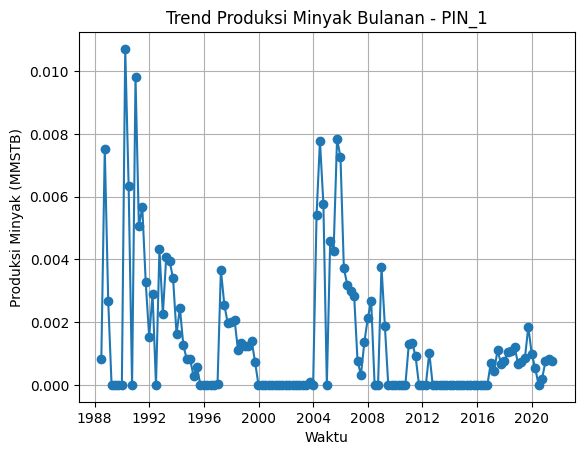

In [48]:
# Plot produksi minyak bulanan untuk sumur PIN_1
plt.plot(PIN_1['Datetime'][::3], PIN_1['Monthly_Oil_Prod (MMSTB)'][::3], marker='o', color='tab:blue')
plt.title('Trend Produksi Minyak Bulanan - PIN_1')
plt.xlabel('Waktu')
plt.ylabel('Produksi Minyak (MMSTB)')
plt.grid(True)
plt.show()


pada sumur PIN_1 terdapat beberapa fase produksi ini ditandai dengan produksi yang beberapa kali di hentikan. Pada fase shut terdapat indikasi jika dilakukan service pada sumur PIN_1 yang ditandai dengan melonjaknya awal prduksi setelah sumur di shut, namun setelah shut terkahir pada 2012 -2016 produksi minyak tidak terlalu naik sehingga diputuskan untuk tidak dilanjutkan.

### b. sumur PIN_2

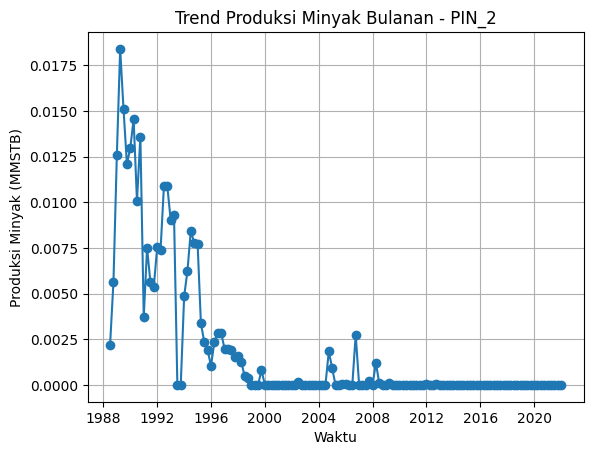

In [49]:
# plot sumur PIN_2 
plt.plot(PIN_2['Datetime'][::3], PIN_2['Monthly_Oil_Prod (MMSTB)'][::3], marker='o', color='tab:blue')
plt.title('Trend Produksi Minyak Bulanan - PIN_2')
plt.xlabel('Waktu')
plt.ylabel('Produksi Minyak (MMSTB)')
plt.grid(True)
plt.show()

pada awal-awal produksi, sumur PIN_2 mengalami kenaikan sampai ahirnya mengalami penurunan sampai ahirnya di shut, pada tahun 2004 dan 2008 sumur coba kembali produksikan, namun tidak terjadi kenaikan.

### c. sumur PIN_3

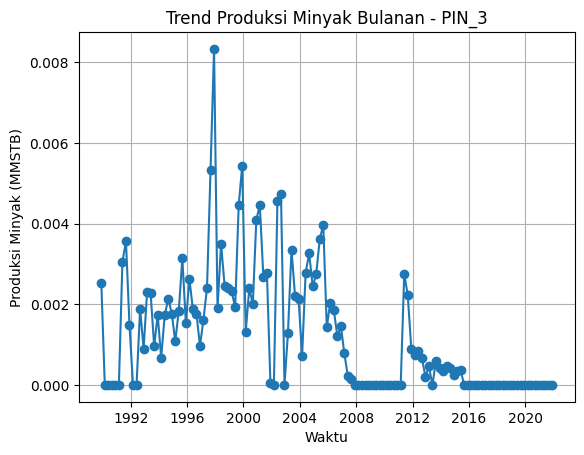

In [50]:
# plot sumur PIN_3 

plt.plot(PIN_3['Datetime'][::3], PIN_3['Monthly_Oil_Prod (MMSTB)'][::3], marker='o', color='tab:blue')
plt.title('Trend Produksi Minyak Bulanan - PIN_3')
plt.xlabel('Waktu')
plt.ylabel('Produksi Minyak (MMSTB)')
plt.grid(True)
plt.show()

sumur PIN_3 mengalami fluaktuasi samoai ahirnya di shut dan dilakukan service pada tahun 2008 - 2012, lalu coba diproduksikan lagi namun tidak optimal

### d. sumur PIN_4

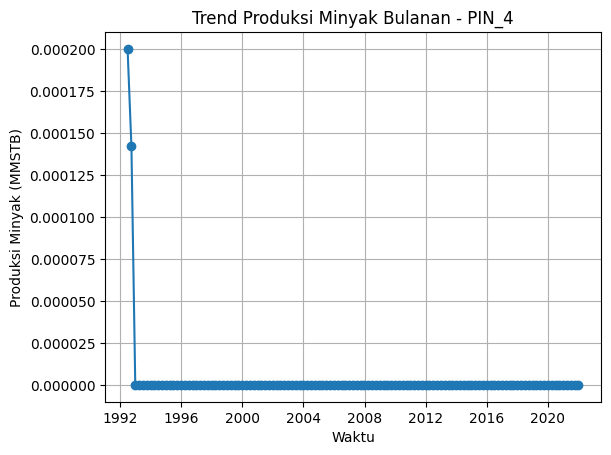

In [51]:
# plot sumur PIN_4 
plt.plot(PIN_4['Datetime'][::3], PIN_4['Monthly_Oil_Prod (MMSTB)'][::3], marker='o', color='tab:blue')
plt.title('Trend Produksi Minyak Bulanan - PIN_4')
plt.xlabel('Waktu')
plt.ylabel('Produksi Minyak (MMSTB)')
plt.grid(True)
plt.show()

sumur PIN_4 tidak memiliki produksi yang baik


### e. sumur PIN_5

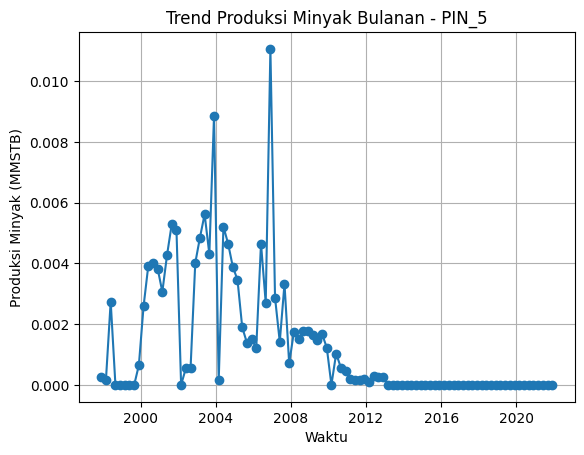

In [52]:
# plot sumur PIN_5 
plt.plot(PIN_5['Datetime'][::3], PIN_5['Monthly_Oil_Prod (MMSTB)'][::3], marker='o', color='tab:blue')
plt.title('Trend Produksi Minyak Bulanan - PIN_5')
plt.xlabel('Waktu')
plt.ylabel('Produksi Minyak (MMSTB)')
plt.grid(True)
plt.show()

sumur PIN_5 sempat di service di awal produksi dan terindikasi berhasil sehingga terus mengalami kenaikan lalu mulai terjadi fluktuasi sampai ahirnya pada 2008 terus mengalai penurunan sampai tidak ada produksi di tahun 2013 awal

### f. sumur PIN_6

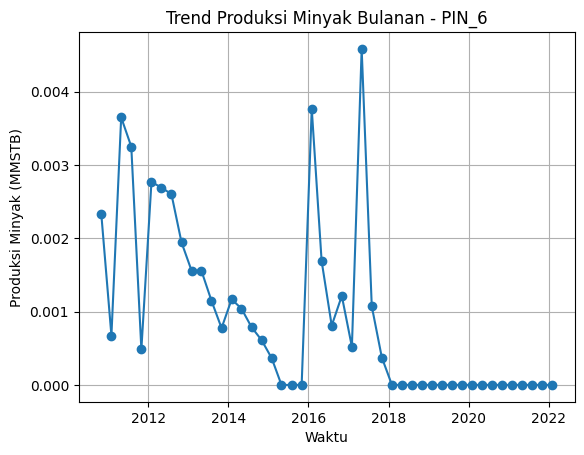

In [53]:
# plot sumur PIN_6 
plt.plot(PIN_6['Datetime'][::3], PIN_6['Monthly_Oil_Prod (MMSTB)'][::3], marker='o', color='tab:blue')
plt.title('Trend Produksi Minyak Bulanan - PIN_6')
plt.xlabel('Waktu')
plt.ylabel('Produksi Minyak (MMSTB)')
plt.grid(True)
plt.show()

produksi sumur PIN_6 cenderung mengalami kenaikan, dan terindikasi pernah dilakuka service pada 2015 lalu berhasil dan ahirmya shut drastis di tahun 2018

## 7. Analisis water cut sebagai penetu kualitas sumur


In [54]:
# buat dataframe baru yang berisi summary dari watercut

# buat daftar nama sumur 
sumur_list = {
    'PIN_1': PIN_1,
    'PIN_2': PIN_2,
    'PIN_3': PIN_3,
    'PIN_4': PIN_4,
    'PIN_5': PIN_5,
    'PIN_6': PIN_6
}

# List untuk menampung hasil summary tiap sumur
summary_data = []

for name, df in sumur_list.items():
    desc = df['Water-Cut (%)'].describe()
    summary_data.append({
        'Well': name,
        'Count': desc['count'],
        'Mean': desc['mean'],
        'Std': desc['std'],
        'Min': desc['min'],
        '25%': desc['25%'],
        '50%': desc['50%'],
        '75%': desc['75%'],
        'Max': desc['max']
    })

# Ubah hasil list menjadi DataFrame
summary_table = pd.DataFrame(summary_data)

# Urutkan dari nilai mean water cut terkecil (artinya performa terbaik)
summary_table = summary_table.sort_values(by='Mean', ascending=True)

# Tampilkan tabel
print(summary_table)


    Well  Count       Mean        Std        Min        25%        50%  \
0  PIN_1  243.0  39.340110  36.294887   0.000000   7.474171  25.241352   
2  PIN_3  243.0  39.866887  29.079850   0.000000  19.689382  32.632850   
1  PIN_2  161.0  42.128241  35.388051   0.000000   4.996592  35.582347   
4  PIN_5  162.0  49.497700  31.724370   0.000000  24.023695  33.594256   
5  PIN_6   78.0  82.671908  14.598301  33.182577  73.652889  88.408982   
3  PIN_4    8.0  99.520405   0.777962  97.709848  99.487058  99.790405   

          75%         Max  
0   86.945457   99.204266  
2   52.181369   98.404372  
1   70.177198  100.000000  
4   83.608419   98.860399  
5   93.354200  100.000000  
3  100.000000  100.000000  


# E. Conclusion

setelah dilakukan analisis didapat bahwa
1. Total produksi setiap sumur berbeda dimana sumur PIN_2 paling banyak (0.830738 MMSTB) dan PIN_4 paling sedikit (0.00101665 MMSTB)
2. Berdasarkan uji Skewness didapat bahwa data terdistribusi tidak normal
3. Setlah dilakukan uji hipotesis dengan metode spearmanr (karna data terdistribusi tidak normal) didapat bahwa H0 gagal ditolak atau produksi air dan minyak memiliki keterkaitan
4. Setelah dihitung dan dibuat kolom baru (water cut) didapat bahwa keseluruhan sumur sudah mencapai max 98+% water cut, artinya sumur-sumur pada pinang field sudah memasuki fase ahir namun perlu analisis lanjutan untuk menentukan apakah masih ekonomis untuk diproduksikan
5. Semua sumur kecuali PIN_4 cenderung normal dan mampu berproduksi dalam jangka waktu yg cukup panjang, sedangkan sumur PIN_4 hanya berproduksi sekitar 1 - 2 tahun saja
6. Berdasarkan data watercut tiap sumur, sumur PIN_1 dan PIN_2 memiliki nilai media water cut paling rendah (39%) walaupun pernah mencapai water cut maksimum 98%+ mungkin sumur ini masih bisa diproduksikan dengan skenario yang menyesuaikan dengan kondisi sumur